# Predictive Framework for Obesity Risk Using Behavioral and Dietary Pattern

This notebook follows a data science approach to design and implement a degree class predictive system for Salem University undergraduate students using machine learning.

In [21]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import re
from joblib import dump

In [58]:
# Load the dataset
file_path = '/content/ObesityDataSet_raw_and_data_sinthetic.csv'
dataset = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Data Head:")
dataset.head()
# print(data.head())

Data Head:


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [60]:
dataset['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [23]:
# Display basic information about the dataset
print("\nData Info:")
print(dataset.info())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                   

In [24]:
# Check for missing values
print("\nMissing Values:")
print(dataset.isnull().sum())


Missing Values:
Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [25]:
dataset.count()

,0
Age,2111
Gender,2111
Height,2111
Weight,2111
CALC,2111
FAVC,2111
FCVC,2111
NCP,2111
SCC,2111
SMOKE,2111


In [26]:
dataset.shape

(2111, 17)

In [27]:
dataset.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP',
       'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE',
       'CAEC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [28]:
# Columns that are not necessary based on project focus
columns_to_drop = ['Height', 'Weight', 'TUE', 'SCC', 'MTRANS']

# Drop these columns from the DataFrame
dataset = dataset.drop(columns=columns_to_drop)
dataset.columns

Index(['Age', 'Gender', 'CALC', 'FAVC', 'FCVC', 'NCP', 'SMOKE', 'CH2O',
       'family_history_with_overweight', 'FAF', 'CAEC', 'NObeyesdad'],
      dtype='object')

In [29]:

# Features to one-hot encode
one_hot_features =  ['CALC', 'FAVC', 'SMOKE', 'CAEC']

# # One-hot encode these features
# dataset = pd.get_dummies(dataset, columns=one_hot_features, drop_first=True)

# One-hot encode these features
# one_hot_encoder = OneHotEncoder(drop='first', sparse=False)
one_hot_encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')
one_hot_encoded = one_hot_encoder.fit_transform(dataset[one_hot_features])

# Create a DataFrame with the one-hot encoded columns
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(one_hot_features))

# Drop the original one-hot encoded columns and concatenate the new ones
dataset = dataset.drop(columns=one_hot_features)
dataset = pd.concat([dataset, one_hot_encoded_df], axis=1)

# Features to label encode
label_encode_features = ['Gender', 'family_history_with_overweight', 'NObeyesdad']

# Label encode these features
label_encoders = {}
for column in label_encode_features:
    le = LabelEncoder()
    dataset[column] = le.fit_transform(dataset[column])
    label_encoders[column] = le


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [30]:
dataset['NObeyesdad'].unique()

array([1, 5, 6, 2, 0, 3, 4])

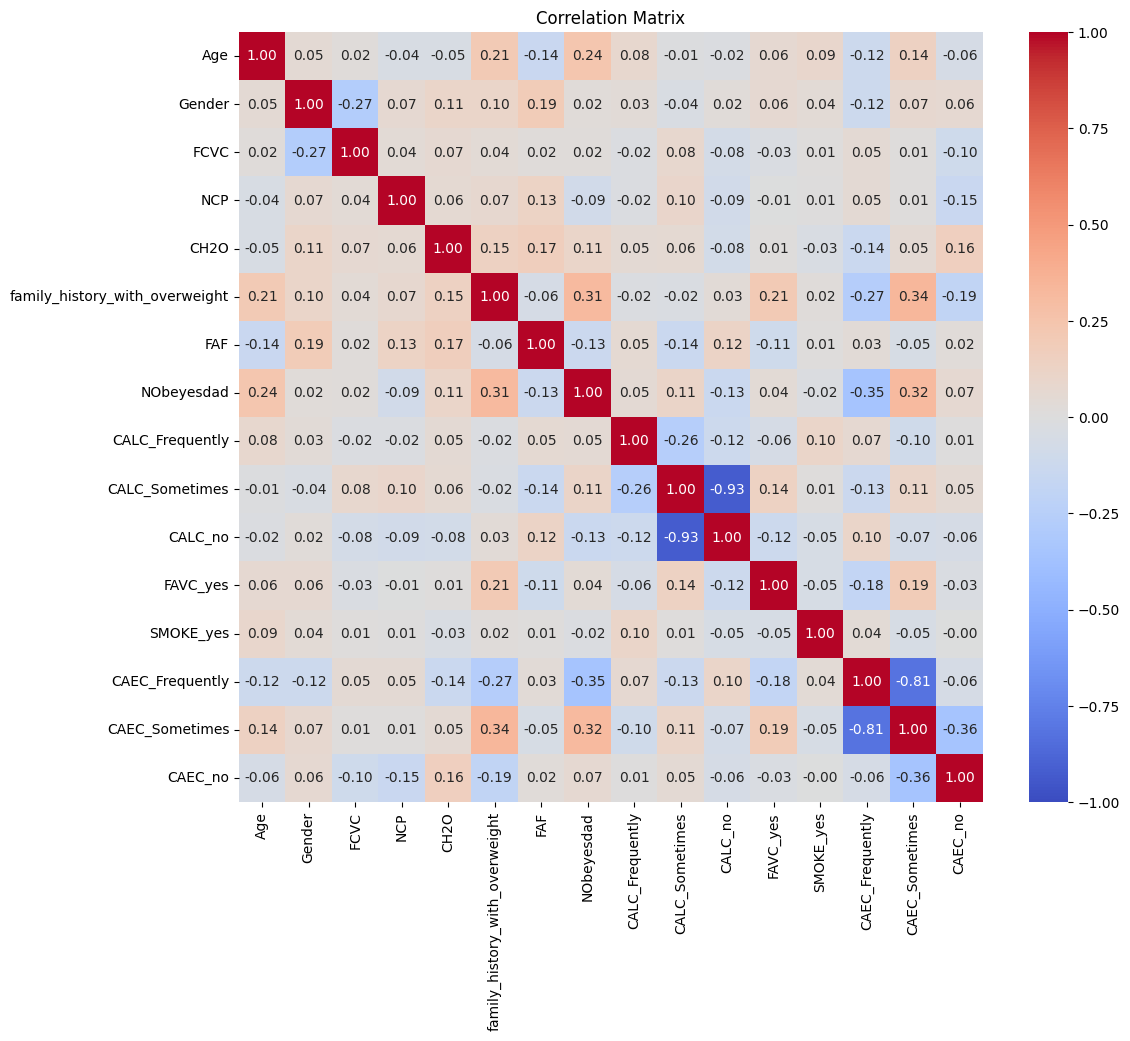

In [32]:
# Calculate the correlation matrix
corr_matrix = dataset.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Display the correlation of each feature with the target variable 'Degree Class'
degree_class_corr = corr_matrix['NObeyesdad'].sort_values(ascending=True)


In [33]:
# Set display option to print all rows
# pd.set_option('display.max_rows', None)

# Print the correlations with 'Degree'
print("\nCorrelation with Degree Class:")
print(degree_class_corr)


Correlation with Degree Class:
CAEC_Frequently                  -0.351827
CALC_no                          -0.134716
FAF                              -0.129564
NCP                              -0.092616
SMOKE_yes                        -0.023256
FCVC                              0.018522
Gender                            0.024908
FAVC_yes                          0.044582
CALC_Frequently                   0.047318
CAEC_no                           0.066715
CH2O                              0.108868
CALC_Sometimes                    0.114104
Age                               0.236170
family_history_with_overweight    0.313667
CAEC_Sometimes                    0.316962
NObeyesdad                        1.000000
Name: NObeyesdad, dtype: float64


In [34]:
X = dataset.drop(columns=['NObeyesdad'])
y = dataset['NObeyesdad']

model = RandomForestClassifier()
model.fit(X, y)

feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)


In [35]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)

feature_scores = pd.Series(selector.scores_, index=X.columns).sort_values(ascending=False)
feature_scores

,0
Gender,158.712595
family_history_with_overweight,146.477128
CAEC_Sometimes,113.455054
FCVC,112.315462
CAEC_Frequently,111.685701
Age,77.954154
CALC_Sometimes,57.597321
CALC_no,50.872273
FAVC_yes,43.578216
NCP,26.811662


In [36]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Train a RandomForestClassifier model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy for RandomForestClassifier model:", accuracy)


Model Accuracy for RandomForestClassifier model: 0.8368794326241135


In [38]:
# Classification report
print("\nClassification Report for RandomForestClassifier model:")
print(classification_report(y_test, y_pred))


Classification Report for RandomForestClassifier model:
              precision    recall  f1-score   support

           0       0.91      0.86      0.88        56
           1       0.66      0.77      0.71        62
           2       0.84      0.83      0.84        78
           3       0.92      0.93      0.92        58
           4       1.00      1.00      1.00        63
           5       0.71      0.71      0.71        56
           6       0.86      0.72      0.78        50

    accuracy                           0.84       423
   macro avg       0.84      0.83      0.84       423
weighted avg       0.84      0.84      0.84       423



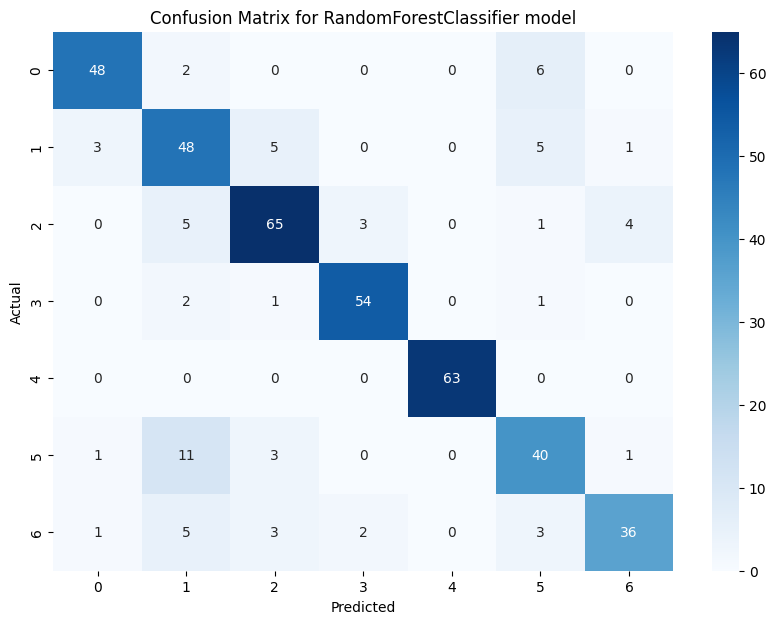

In [39]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for RandomForestClassifier model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [40]:

# Train a LogisticRegression model
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_log_reg = log_reg_model.predict(X_test)

# Evaluate the model
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("\nLogistic Regression Model Accuracy:", accuracy_log_reg)


Logistic Regression Model Accuracy: 0.5721040189125296


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.53      0.68      0.59        56
           1       0.50      0.23      0.31        62
           2       0.62      0.65      0.64        78
           3       0.56      0.78      0.65        58
           4       0.79      1.00      0.88        63
           5       0.31      0.25      0.28        56
           6       0.49      0.34      0.40        50

    accuracy                           0.57       423
   macro avg       0.54      0.56      0.54       423
weighted avg       0.55      0.57      0.55       423



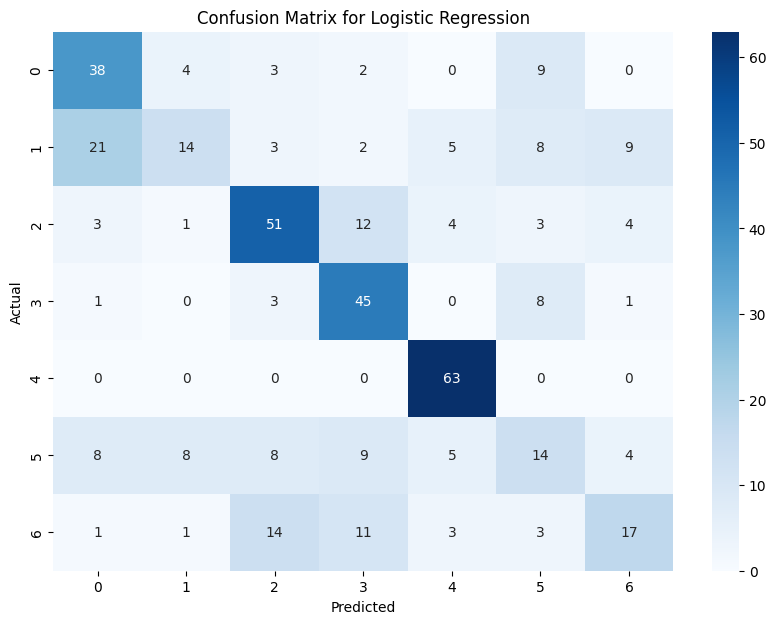

In [41]:

# Classification report
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_log_reg))

# Confusion matrix
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [42]:

# Train a SVM model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("\nSVM Model Accuracy:", accuracy_svm)


SVM Model Accuracy: 0.4397163120567376


In [43]:
# Classification report
print("\nClassification Report for SVM:")
print(classification_report(y_test, y_pred_svm))


Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.32      0.84      0.47        56
           1       0.60      0.10      0.17        62
           2       0.61      0.38      0.47        78
           3       0.46      0.66      0.54        58
           4       0.59      0.87      0.70        63
           5       0.23      0.12      0.16        56
           6       0.25      0.06      0.10        50

    accuracy                           0.44       423
   macro avg       0.44      0.43      0.37       423
weighted avg       0.45      0.44      0.38       423



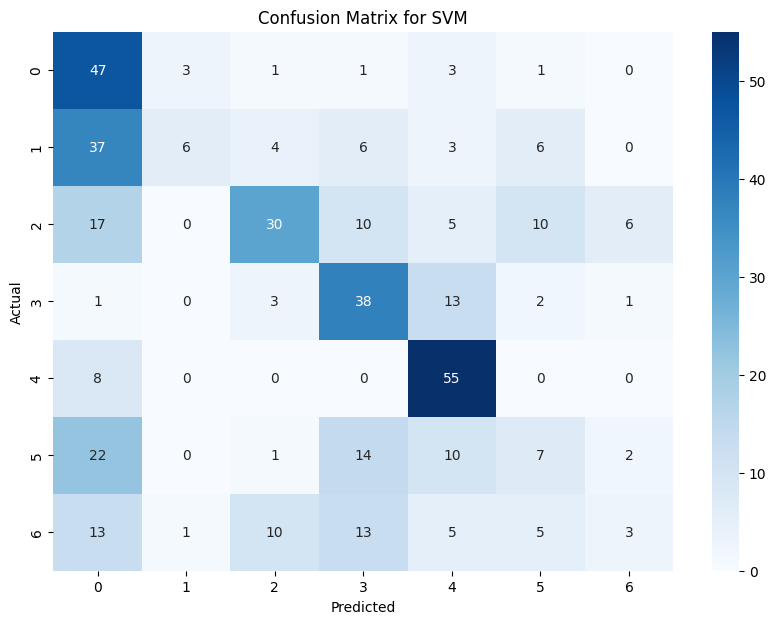

In [44]:
# Confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [45]:
# Train a k-NN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("\nK-NN Model Accuracy:", accuracy_knn)


K-NN Model Accuracy: 0.7494089834515366


In [46]:
# Classification report
print("\nClassification Report for K-NN:")
print(classification_report(y_test, y_pred_knn))




Classification Report for K-NN:
              precision    recall  f1-score   support

           0       0.68      0.84      0.75        56
           1       0.77      0.39      0.52        62
           2       0.71      0.83      0.77        78
           3       0.72      0.93      0.81        58
           4       0.94      1.00      0.97        63
           5       0.71      0.71      0.71        56
           6       0.71      0.48      0.57        50

    accuracy                           0.75       423
   macro avg       0.75      0.74      0.73       423
weighted avg       0.75      0.75      0.73       423



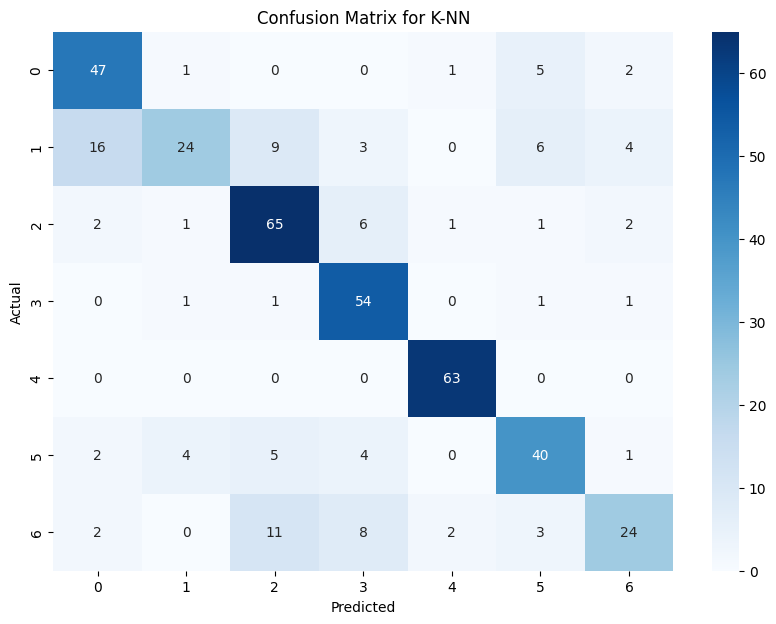

In [47]:
# Confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for K-NN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [48]:


# Train a GradientBoosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("\nGradient Boosting Model Accuracy:", accuracy_gb)



Gradient Boosting Model Accuracy: 0.789598108747045


In [49]:
# Classification report
print("\nClassification Report for Gradient Boosting:")
print(classification_report(y_test, y_pred_gb))


Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83        56
           1       0.62      0.69      0.66        62
           2       0.81      0.77      0.79        78
           3       0.83      0.90      0.86        58
           4       1.00      1.00      1.00        63
           5       0.69      0.68      0.68        56
           6       0.73      0.64      0.68        50

    accuracy                           0.79       423
   macro avg       0.79      0.79      0.79       423
weighted avg       0.79      0.79      0.79       423



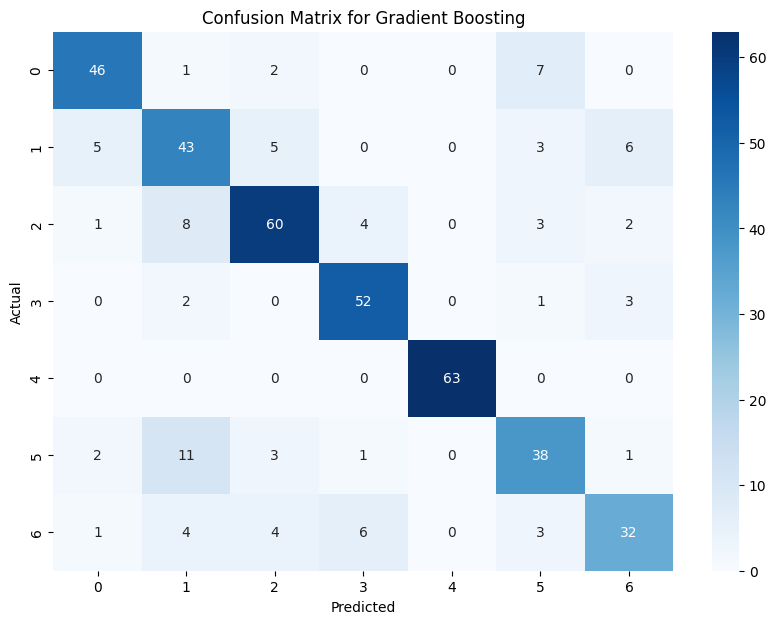

In [50]:
# Confusion matrix
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [51]:


# Train a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("\nDecision Tree Model Accuracy:", accuracy_dt)


Decision Tree Model Accuracy: 0.7092198581560284


In [52]:
# Classification report
print("\nClassification Report for Decision Tree:")
print(classification_report(y_test, y_pred_dt))


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.81      0.68      0.74        56
           1       0.51      0.47      0.49        62
           2       0.74      0.64      0.68        78
           3       0.83      0.95      0.89        58
           4       1.00      1.00      1.00        63
           5       0.51      0.61      0.55        56
           6       0.56      0.62      0.59        50

    accuracy                           0.71       423
   macro avg       0.71      0.71      0.71       423
weighted avg       0.71      0.71      0.71       423



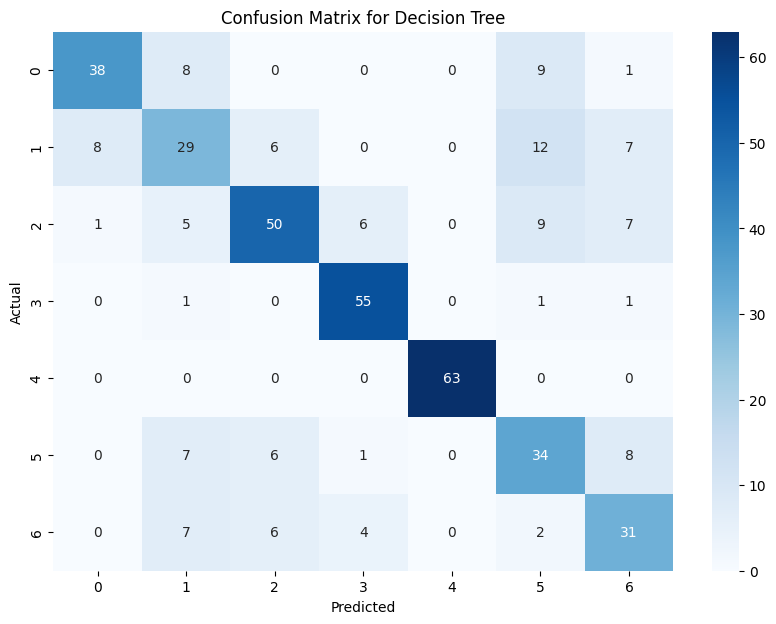

In [53]:
# Confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [54]:
y_pred_dt

array([0, 4, 0, 0, 6, 0, 3, 5, 6, 0, 2, 4, 3, 3, 4, 2, 4, 3, 2, 6, 2, 5,
       4, 5, 5, 6, 6, 4, 4, 0, 4, 5, 6, 6, 0, 4, 5, 1, 5, 1, 2, 3, 6, 1,
       2, 0, 3, 2, 2, 3, 0, 1, 2, 5, 0, 1, 3, 3, 5, 3, 1, 4, 6, 0, 5, 1,
       1, 4, 0, 1, 6, 2, 0, 0, 2, 3, 3, 1, 4, 3, 1, 2, 3, 3, 2, 6, 1, 2,
       5, 2, 6, 3, 0, 2, 5, 0, 1, 1, 2, 3, 2, 2, 4, 2, 6, 2, 5, 4, 4, 3,
       2, 5, 3, 2, 0, 2, 2, 6, 6, 5, 4, 3, 2, 5, 6, 3, 2, 2, 4, 3, 4, 3,
       0, 6, 1, 4, 5, 4, 5, 0, 5, 6, 0, 1, 1, 3, 2, 4, 5, 5, 0, 1, 0, 3,
       6, 5, 1, 1, 0, 5, 1, 5, 2, 0, 3, 1, 3, 1, 5, 6, 0, 1, 3, 4, 2, 6,
       2, 6, 2, 1, 5, 3, 0, 5, 3, 5, 5, 4, 3, 3, 0, 4, 0, 1, 4, 2, 3, 2,
       4, 5, 3, 3, 4, 4, 5, 4, 5, 3, 1, 4, 6, 2, 1, 2, 3, 5, 5, 3, 3, 1,
       4, 6, 3, 1, 3, 2, 0, 4, 6, 5, 6, 4, 0, 5, 0, 2, 2, 6, 2, 0, 6, 6,
       6, 3, 6, 1, 1, 2, 2, 0, 5, 2, 0, 1, 1, 3, 2, 3, 5, 2, 4, 4, 6, 2,
       3, 4, 4, 1, 1, 4, 3, 4, 6, 2, 3, 2, 3, 4, 3, 1, 0, 5, 6, 4, 4, 5,
       2, 1, 0, 3, 2, 5, 1, 6, 0, 1, 3, 3, 3, 3, 1,

In [56]:
dataset['NObeyesdad'].unique()

array([1, 5, 6, 2, 0, 3, 4])

In [57]:
# Save the model and encoders
dump(gb_model, 'Obesit_Risk_Using_Behavioral_and_Dietary_Pattern.joblib')
dump(one_hot_encoder, 'one_hot_encoder.joblib')
dump(label_encoders, 'label_encoders.joblib')

['label_encoders.joblib']